## Customer Personality Segmentation

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.<br>

Here, we will analyze the data consists of customer attribute, purchase history and campaign response. Based on our analysis, we will segment the customers into different categories.<br>

Our strategy is:<br.>
1. Load the data  
2. High level EDA <br>
   a. Stats <br>
   b. Check data types <br>
   c. Check missing values <br>
   d. Check duplicate values <br>
   e. Check unique values <br>
   f. Clean up categorical values <br>
3. EDA <br>
   a. Catgorical features <br>
   b. Numerical features <br>
   c. Correlation Analysis <br>
4. Preprocessing <br>
   a. Outliers detection & removal
5. Export data

In [53]:
# Imports 

# General
from datetime import datetime

# Data
import pandas as pd 
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt  

#### 1. Load data

In [17]:
data = pd.read_csv("../data/raw/marketing_campaign.csv", sep="\t")

In [7]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### 2. High level EDA
##### a. High level stats

In [18]:
print("Shape of data: {0}".format(data.shape))

Shape of data: (2240, 29)


In [19]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [42]:
# The columns Z_CostContact & Z_Revenue seem to be irrelevant. Lets drop them.
data.drop(['Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [43]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### b. Check data types

In [44]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [56]:
# Change data type of 'Dt_customer' from string to date 
print("Type of 'Dt_customer' before: {0}".format(type(data['Dt_Customer'][0])))
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%d-%m-%Y") 
print("Type of 'Dt_customer' after: {0}".format(type(data['Dt_Customer'][0])))

Type of 'Dt_customer' before: <class 'str'>
Type of 'Dt_customer' after: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


##### c. Check missing values

In [45]:
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [23]:
data[data['Income'].isna()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0


Lets note some index: 10, 27, 43, 48, 58<br>
Lets replace NaN in 'Income' with mean or median of 'Income'. Since 'Income' may have outliers, we will go ahead with Median.

In [25]:
income_mean = data['Income'].mean()
income_median = data['Income'].median()
print('Mean income is: :{0}\nMedian income is: {1}'.format(income_mean, income_median))

Mean income is: :52247.25135379061
Median income is: 51381.5


In [29]:
data['Income'] = data['Income'].fillna(income_median)

In [31]:
data.loc[[10, 27, 43, 48, 58]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,51381.5,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,51381.5,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,51381.5,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,51381.5,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,51381.5,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0


In [46]:
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

##### d. Check duplicate values

In [47]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


##### e. Check unique values

In [48]:
data.nunique().sort_values(ascending=False)

ID                     2240
Income                 1975
MntWines                776
Dt_Customer             663
MntMeatProducts         558
MntGoldProds            213
MntFishProducts         182
MntSweetProducts        177
MntFruits               158
Recency                 100
Year_Birth               59
NumWebVisitsMonth        16
NumDealsPurchases        15
NumWebPurchases          15
NumStorePurchases        14
NumCatalogPurchases      14
Marital_Status            8
Education                 5
Teenhome                  3
Kidhome                   3
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

##### f. Clean up categorical values

In [82]:
# Lets check values in categorical features 'Marital Status' and 'Education'
data.groupby(by="Marital_Status")['ID'].count()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: ID, dtype: int64

Here we can say that the values "Absurd", "Alone", and "YOLO" have high probability that they are same as "Single". So lets group them to "Single".
And "Widow" is same as "Divorced", so lets group that as well. 

In [186]:
data['Marital_Status'] = data['Marital_Status'].replace(['Absurd', 'Alone', 'YOLO'], 'Single')
data['Marital_Status'] = data['Marital_Status'].replace('Widow', 'Divorced')

In [187]:
data.groupby(by="Marital_Status")['ID'].count()

Marital_Status
Divorced    309
Married     864
Single      487
Together    580
Name: ID, dtype: int64

In [85]:
# Lets check values for Education
data.groupby(by="Education")['ID'].count()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: ID, dtype: int64

Since '2n Cycle' is almost same as 'Basic', lets group it together with 'Basic'

In [188]:
data['Education'] = data['Education'].replace('2n Cycle', 'Basic')

In [189]:
data.groupby(by="Education")['ID'].count()

Education
Basic          257
Graduation    1127
Master         370
PhD            486
Name: ID, dtype: int64

#### 3. EDA (deep dive)

In [49]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [149]:
# Lets divide all our columns into categorical & numerical
categorical_features = []
numerical_features = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

numerical_features.remove('ID')
print("Categorical features: {0}".format(categorical_features))
print("Numerical features: {0}".format(numerical_features))

Categorical features: ['Education', 'Marital_Status']
Numerical features: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


##### 1. Univariate Analysis

Categorical features

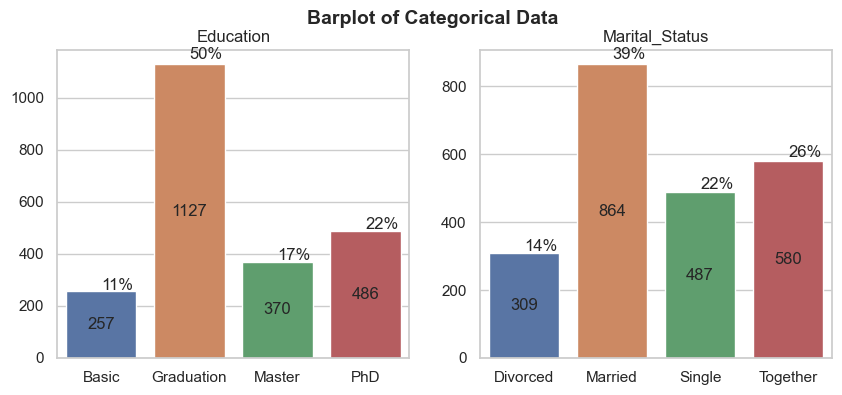

In [191]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Barplot of Categorical Data', fontsize=14, fontweight='bold')
sns.set_style('whitegrid')
for index, col in enumerate(categorical_features):
    viz_data = np.unique(data[col], return_counts = True)
    # Plotting
    ax1 = fig.add_subplot(1,2,index+1)
    ax1 = sns.barplot(x=viz_data[0], y=viz_data[1])
    
    # Labelling
    ax1.set_title(col)
    ax1.bar_label(ax1.containers[0], label_type='center')
    
    # Plot percentages using annotate
    for p in ax1.patches:
        perc = '{:.0f}%'.format(100 * p.get_height()/len(data[col]))
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + (p.get_height()*1.02)
        ax1.annotate(perc, (x, y))
plt.show()


Numerical features

In [153]:
numerical_features_to_plot = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (data[col].nunique()>2)):
        numerical_features_to_plot.append(col)


In [201]:
numerical_features_to_plot.remove('Dt_Customer')
numerical_features_to_plot

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

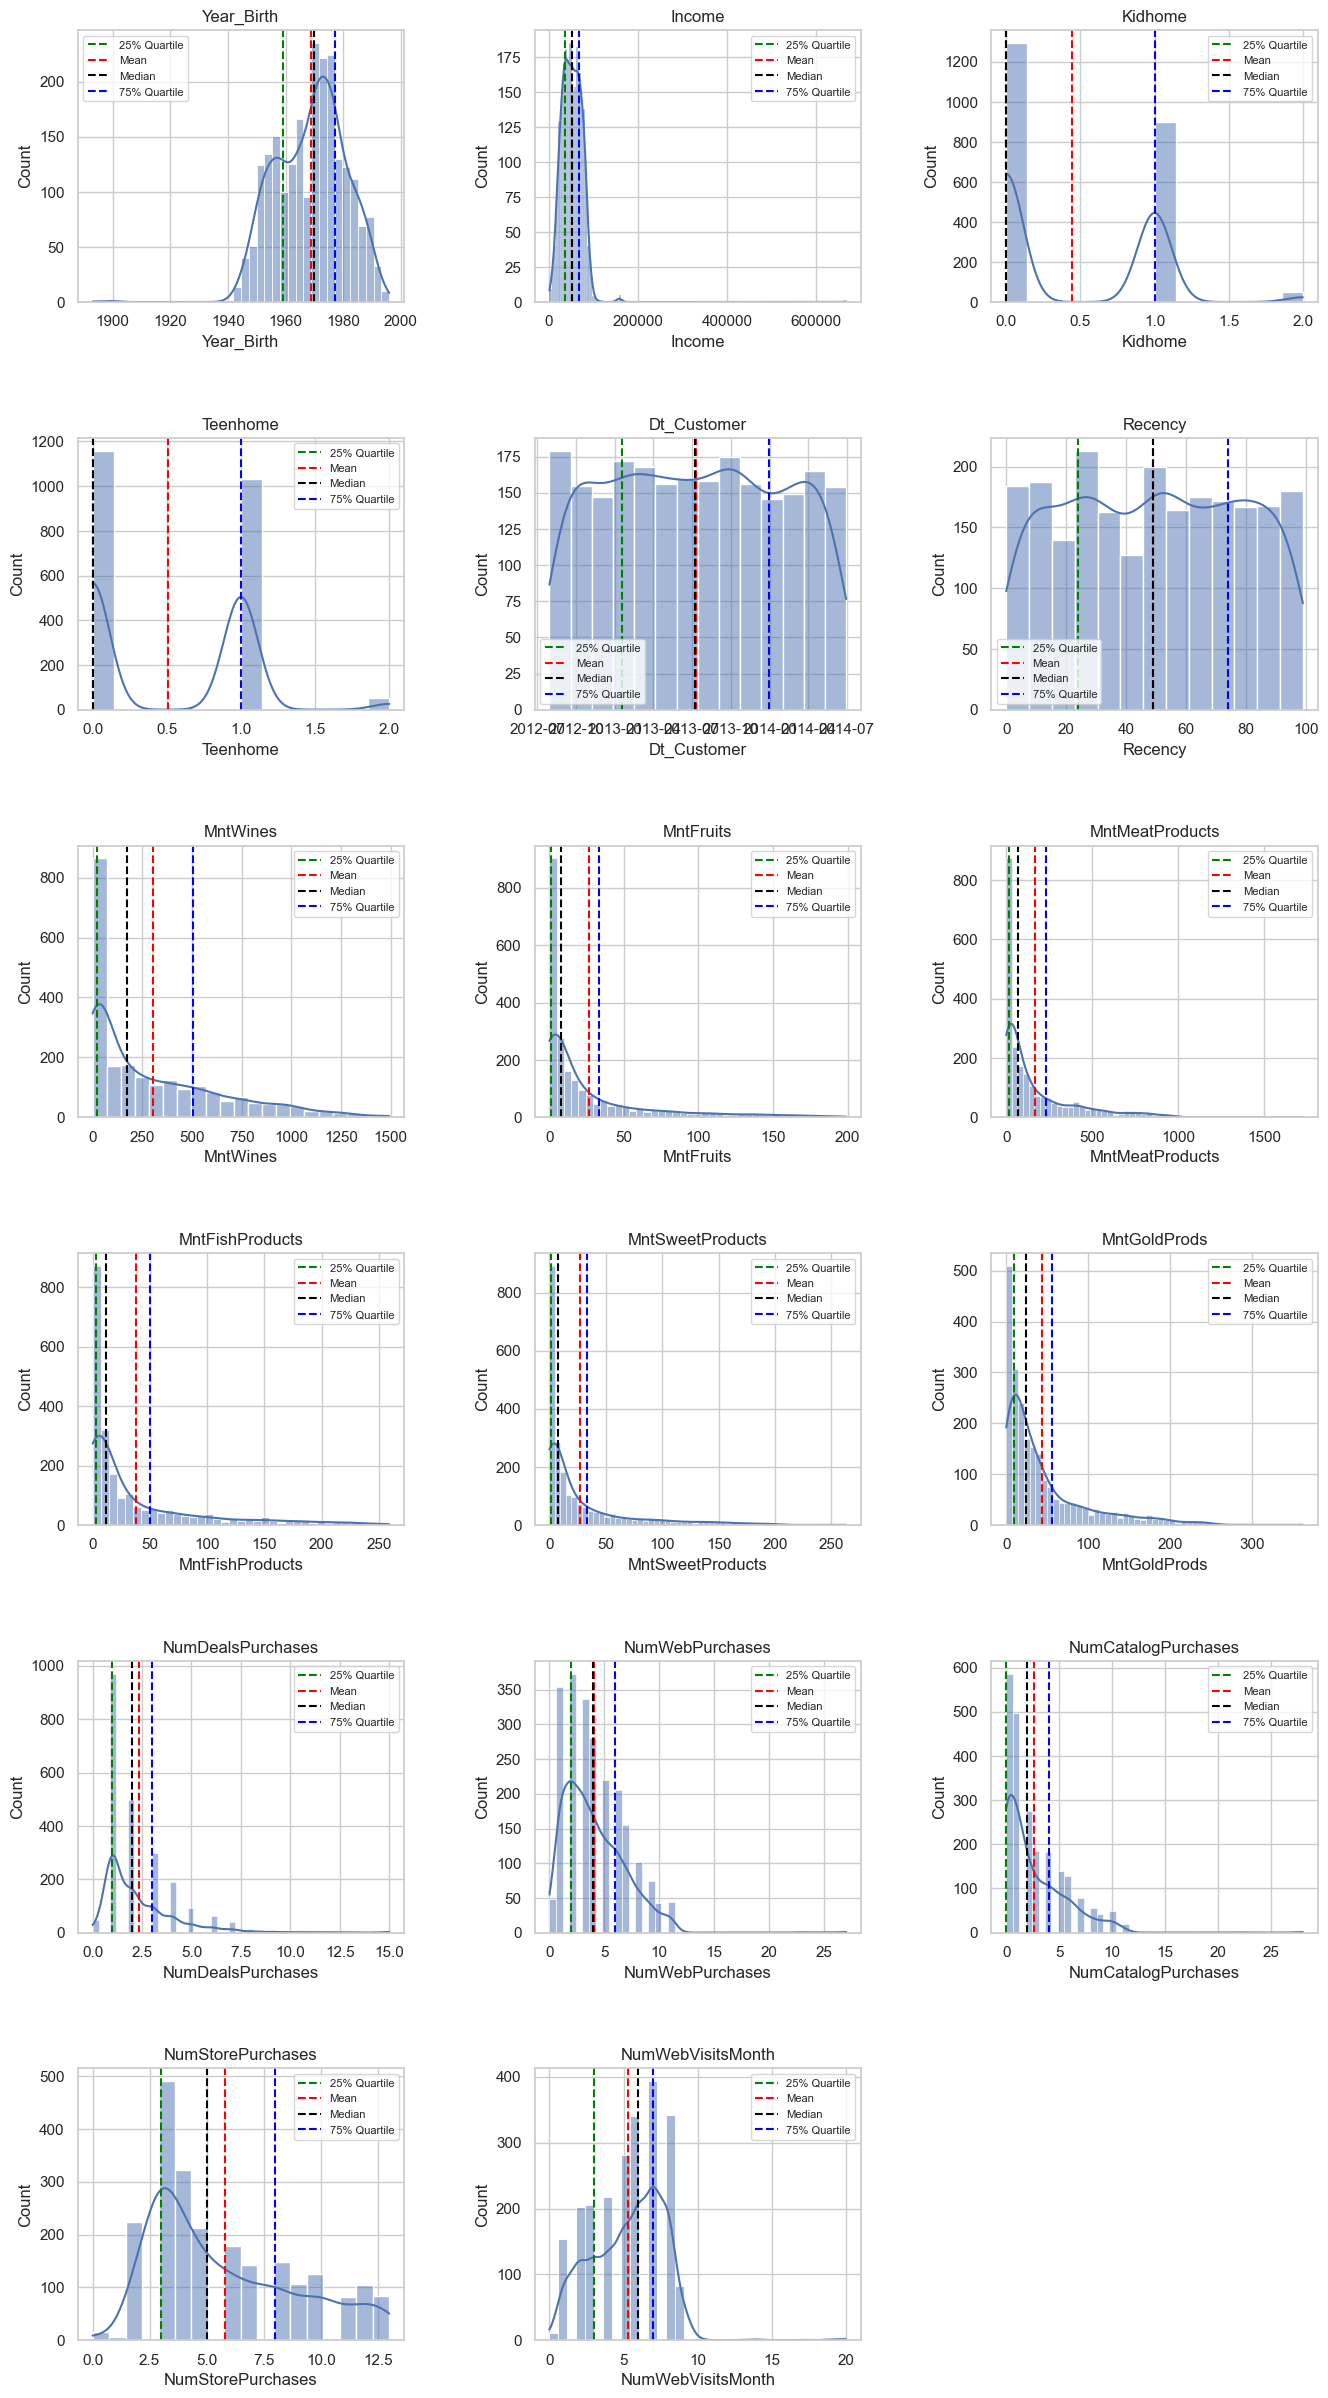

In [123]:
fig = plt.figure(figsize=(16,30))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
sns.set_style('whitegrid')
for index, col in enumerate(numerical_features_to_plot):
    # Plotting
    ax2 = fig.add_subplot(6,3,index+1)
    ax2 = sns.histplot(data[col], kde=True)

    # Reference lines
    ax2.axvline(data[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax2.axvline(data[col].mean(),color='red',linestyle='--',label='Mean')
    ax2.axvline(data[col].median(),color='black',linestyle='--',label='Median')
    ax2.axvline(data[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')

    # Labelling
    ax2.set_title(col)
    ax2.legend(fontsize=8)

plt.show()

##### c. Correlation Analysis

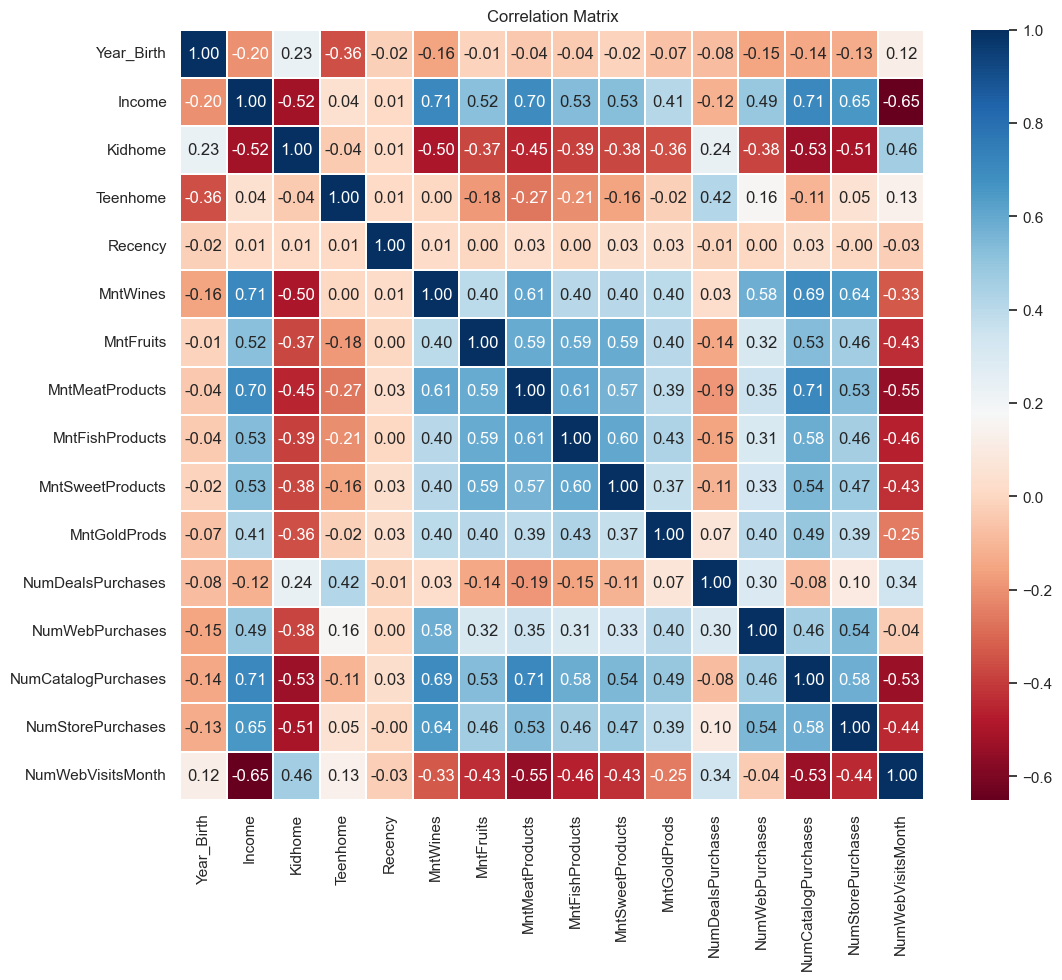

In [206]:
fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(data[numerical_features_to_plot].corr(), annot=True, linewidths=0.05, fmt='.2f', cmap='RdBu')
ax.tick_params(axis='both', which='major')
ax.set_title('Correlation Matrix')
plt.show()

#### 4. Preprocessing

##### a. Outlier Detection

In [193]:
data_numericals = data[numerical_features_to_plot]
outliers_q1 = data_numericals.quantile(0.25)
outliers_q3 = data_numericals.quantile(0.75)
IQR = outliers_q3 - outliers_q1

# We'll take 5 times of IQR as threshold since we have lesser data
((data_numericals < (outliers_q1 - 5 * IQR)) | (data_numericals > (outliers_q3 + 5 * IQR))).any()


ID                     False
Year_Birth             False
Income                  True
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits               True
MntMeatProducts         True
MntFishProducts        False
MntSweetProducts        True
MntGoldProds            True
NumDealsPurchases       True
NumWebPurchases         True
NumCatalogPurchases     True
NumStorePurchases      False
NumWebVisitsMonth      False
dtype: bool

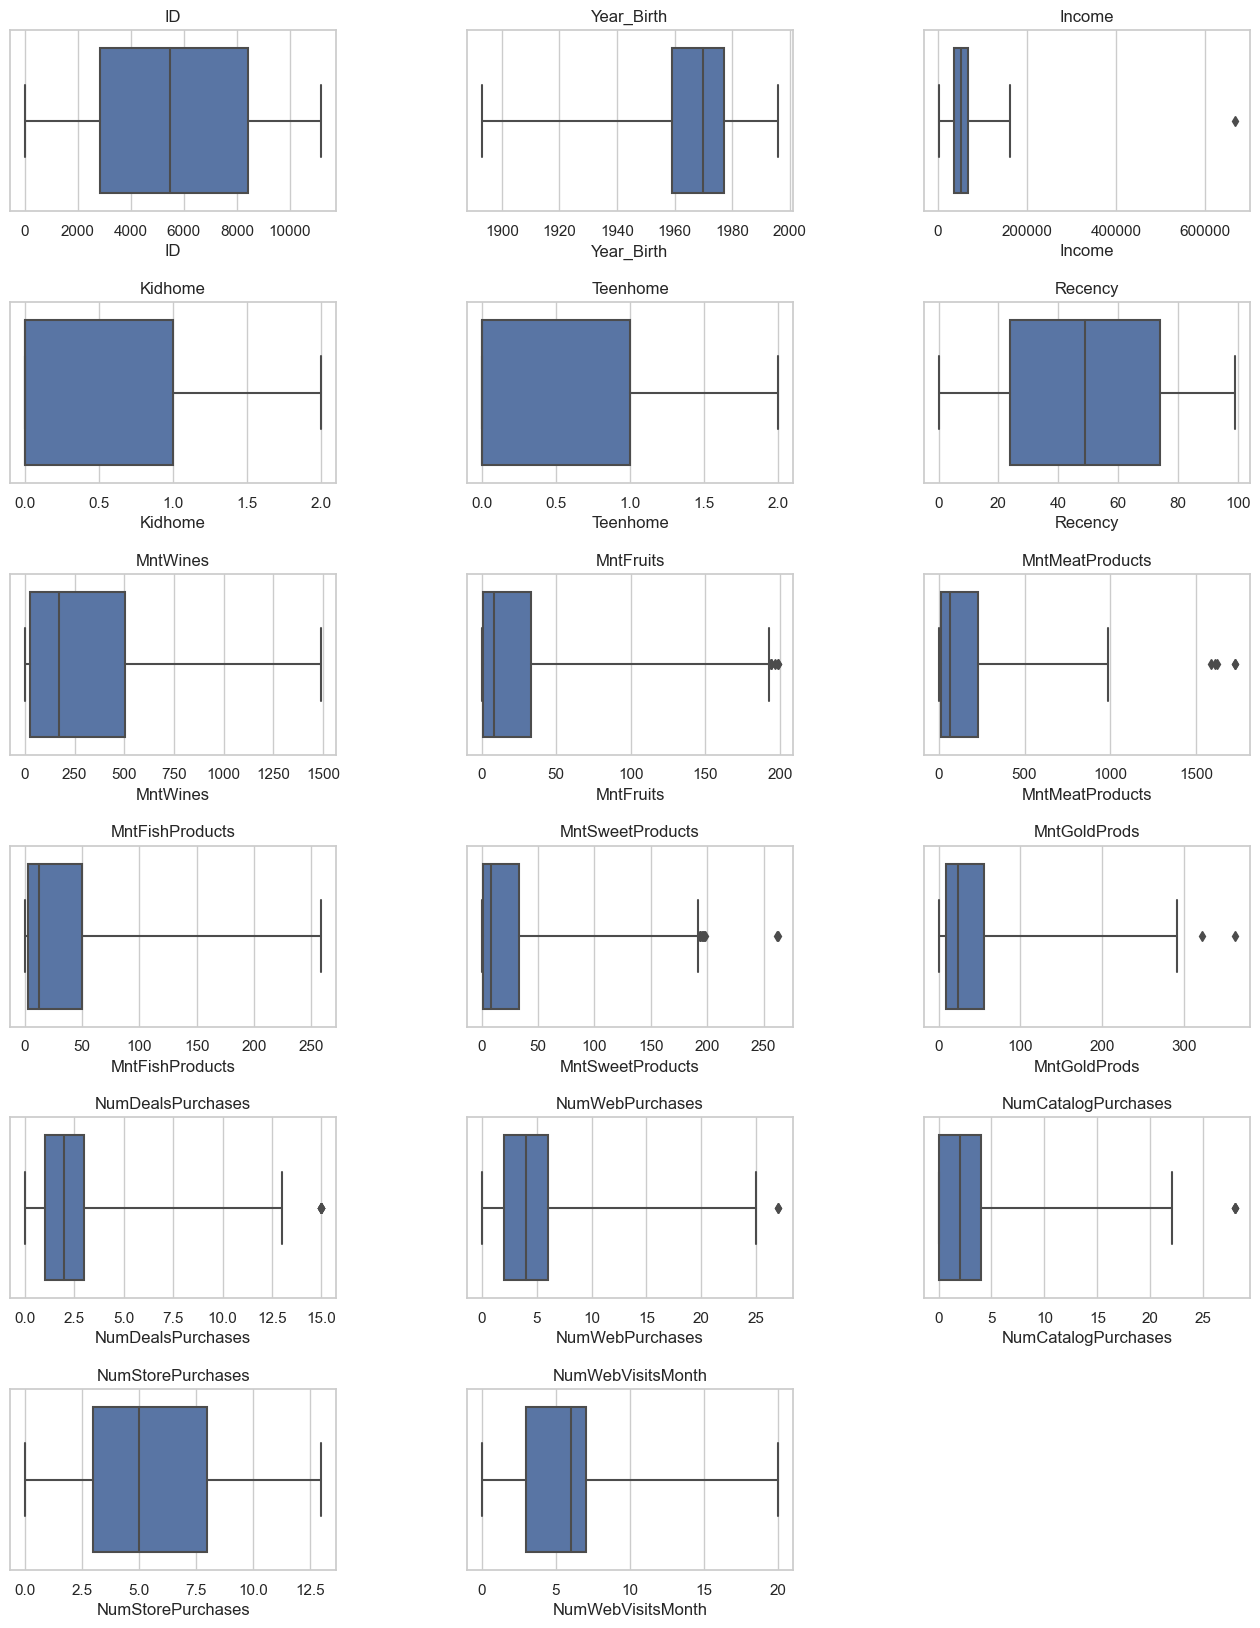

In [185]:
fig = plt.figure(figsize=(16,20))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
sns.set_style('whitegrid')
for index, col in enumerate(numerical_features_to_plot):
    # Plotting
    ax2 = fig.add_subplot(6,3,index+1)
    ax2 = sns.boxplot(data = data, x = col, whis=5)

    # Labelling
    ax2.set_title(col)

plt.show()

In [181]:
dict = {}
for col in data[numerical_features_to_plot]:
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    IQR = percentile75 - percentile25
    upper_limit = percentile75 + IQR*5
    lower_limit = percentile25 - IQR*5
    dict["upper_lim_"+col] = upper_limit 
    dict["lower_lim_"+col] = lower_limit

In [182]:
for col in data[numerical_features_to_plot]:
    print(col+" | lower: {0}, upper: {1}".format(  len(data[data[col] < dict["lower_lim_"+col]]), len(data[data[col] > dict["upper_lim_"+col]])    ))

ID | lower: 0, upper: 0
Year_Birth | lower: 0, upper: 0
Income | lower: 0, upper: 1
Kidhome | lower: 0, upper: 0
Teenhome | lower: 0, upper: 0
Recency | lower: 0, upper: 0
MntWines | lower: 0, upper: 0
MntFruits | lower: 0, upper: 6
MntMeatProducts | lower: 0, upper: 5
MntFishProducts | lower: 0, upper: 0
MntSweetProducts | lower: 0, upper: 9
MntGoldProds | lower: 0, upper: 2
NumDealsPurchases | lower: 0, upper: 7
NumWebPurchases | lower: 0, upper: 2
NumCatalogPurchases | lower: 0, upper: 3
NumStorePurchases | lower: 0, upper: 0
NumWebVisitsMonth | lower: 0, upper: 0


In [178]:
def removeOutlierData(df, feature):
    print("Rows before removing outliers for {0}: {1}".format(feature, len(df)))
    df.drop(df[ (df[feature] < dict["lower_lim_"+feature]) | (df[feature] > dict["upper_lim_"+feature]) ].index, inplace=True)
    print("Rows after removing outliers for {0}: {1}".format(feature, len(df)))

In [194]:
data_bkp = data.copy()

In [195]:
print("Total rows before removing outleirs: {0}\n".format(len(data)))
for col in data_without_outliers[numerical_features_to_plot]:
    removeOutlierData(data, col)
print("\nTotal rows after removing outliers: {0}".format(len(data)))

Total rows before removing outleirs: 2240

Rows before removing outliers for ID: 2240
Rows after removing outliers for ID: 2240
Rows before removing outliers for Year_Birth: 2240
Rows after removing outliers for Year_Birth: 2240
Rows before removing outliers for Income: 2240
Rows after removing outliers for Income: 2239
Rows before removing outliers for Kidhome: 2239
Rows after removing outliers for Kidhome: 2239
Rows before removing outliers for Teenhome: 2239
Rows after removing outliers for Teenhome: 2239
Rows before removing outliers for Recency: 2239
Rows after removing outliers for Recency: 2239
Rows before removing outliers for MntWines: 2239
Rows after removing outliers for MntWines: 2239
Rows before removing outliers for MntFruits: 2239
Rows after removing outliers for MntFruits: 2233
Rows before removing outliers for MntMeatProducts: 2233
Rows after removing outliers for MntMeatProducts: 2228
Rows before removing outliers for MntFishProducts: 2228
Rows after removing outliers

Export data

In [198]:
data.to_csv("../data/processed/processed_data.csv", index=False)
print("Data exported!")

Data exported!
